# Titanic Data Analysis

## Introduction
**Purpose:** To performa data analysis on a sample Titanic dataset. 

This dataset contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. You can view a description of this dataset on the Kaggle website, where the data was obtained (https://www.kaggle.com/c/titanic/data).


## Questions

"One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class." -  https://www.kaggle.com/c/titanic

What factors made people more likely to survive?
1. **Were social-economic standing a factor in survival rate?**
2. **Did age, regardless of sex, determine your chances of survival?**
3. **Did women and children have preference to lifeboats (survival)?**
4. **Did women with children have a better survival rate vs women without children (adults 18+)?**

**Assumption:** We are going to assume that everyone who survived made it to a life boat and it wasn't by chance or luck.

## Data Wrangling 

### Data Description

- **survival:** Survival (0 = No; 1 = Yes)
- **pclass:** Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- **name:** Name
- **sex:** Sex
- **age:** Age
- **sibsp:** Number of Siblings/Spouses Aboard
- **parch:** Number of Parents/Children Aboard
- **ticket:** Ticket Number
- **fare:** Passenger Fare
- **cabin:** Cabin
- **embarked:** Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

**Special Notes:**
- Pclass is a proxy for socio-economic status (SES) 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower
- Age is in Years; Fractional if Age less than One (1) If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch) some relations were ignored.  The following are the definitions used for sibsp and parch.

- **Sibling:**  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
- **Spouse:**   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
- **Parent:**   Mother or Father of Passenger Aboard Titanic
- **Child:**    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins, nephews/nieces, aunts/uncles, and in-laws.  Some children travelled only with a nanny, therefore parch=0 for them.  As well, some travelled with very close friends or neighbors in a village, however, the definitions do not support such relations.

In [37]:
# Render plots inline
%matplotlib inline

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for all graphs
sns.set_style("dark")

# Set the filename variable and read in the dataset
data_file = 'titanic_data.csv'
titanic_data = pd.read_csv(data_file)

In [38]:
# Print the first few records review data and format
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
# Print the last few records review data and format
titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


**Note:** Age can be NaN, ticket and cabin are alphanumeric and also missing values with NaN

**Additional Questions from reading data**
- How did children with nanny's compare fare in compariso to children with parents. Did the nanny "abandon" the child to save his/her own life?
 - I would need additional information to determine if a child was indeed only on board with a nanny. For example, a child could be on board with an adult sibling. This would make Parch (parent) = 0 but it would be incorrect to say the child had a nanny.
 - Need to review list for children with no siblings. These will be children with nannies. Potential **Q5**
- Did cabin location play a part in the survival rate without the consideration of class
 - No data on where the cabins are actually located on the Titanic

### Data Cleanup

From the data description and questions to answer, I've determined that some dataset columns will not play a part in my analysis and these columns can therefore be removed. This will decluster the dataset and also help with process performance of the dataset. 
- PassengerId
- Name
- Ticket
- Cabin

I'll take a 3 step process to data cleanup
1. Identify and remove any duplicate entries
2. Remove unnecessary columns
3. Fix missing and data format issues

#### Step 1 - Remove duplicate entries
Concluded that no duplicate entires exist, based on tests below

In [40]:
# Identify and remove duplicate entries
titanic_data_duplicates = titanic_data.duplicated()
print 'Number of duplicate entries is/are {}'.format(titanic_data_duplicates.sum())

Number of duplicate entries is/are 0


In [41]:
# Let us just make sure this is working
duplicate_test = titanic_data.duplicated('Age').head()
print 'Number of entries with duplicate age in top entires are {}'.format(duplicate_test.sum())
titanic_data.head()

Number of entries with duplicate age in top entires are 1


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Step 2 - Remove unnecessary columns
Columns (PassengerId, Name, Ticket, Cabin) removed

In [42]:
# Create new dataset with unwanted columns
titanic_data_cleaned = titanic_data.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)
titanic_data_cleaned.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


#### Step 3 - Fix any missing or data format issues

In [43]:
# Calculate number of missing values
titanic_data_cleaned.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [44]:
# Review some of the missing Age data
missing_age_bool = pd.isnull(titanic_data_cleaned['Age'])
titanic_data_cleaned[missing_age_bool].head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,3,male,NaN,0,0,8.4583,Q
17,1,2,male,NaN,0,0,13.0000,S
19,1,3,female,NaN,0,0,7.2250,C
26,0,3,male,NaN,0,0,7.2250,C
28,1,3,female,NaN,0,0,7.8792,Q


In [45]:
# Determine number of males and females with missing age values
missing_age_female = titanic_data_cleaned[missing_age_bool]['Sex'] == 'female'
missing_age_male = titanic_data_cleaned[missing_age_bool]['Sex'] == 'male'

print 'Number for females and males with age missing are {} and {} respectively'.format(
missing_age_female.sum(),missing_age_male.sum())

Number for females and males with age missing are 53 and 124 respectively


In [46]:
# Taking a look at the datatypes
titanic_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [47]:
# Update Sex and Embarked to be str instead of object datatypes - Is this necessary for analysis???

Missing Embarked data for 2 entries shouldn't be an issue.

Missing Age data will affect **Q2 - Did age, regardless of sex, determine your chances of survival?** But graphing and summations shouldn't be a problem since they will be treated as zero value. However, 177 is roughly 20% of our 891 sample dataset which seems like a lot to discount. Also, this needs to be accounted for if reviewing descriptive stats such as mean age. 

Should keep note of the proportions across male and female...

- Age missing in male data: **124**
- Age missing in female data: **53**

## Data Exploration and Visualization

In [48]:
# Looking at some typical descriptive statistics
titanic_data_cleaned.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [49]:
# Age min at 0.42 looks a bit weird so give a closer look
titanic_data_cleaned[titanic_data_cleaned['Age'] < 1]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
78,1,2,male,0.83,0,2,29.0000,S
305,1,1,male,0.92,1,2,151.5500,S
469,1,3,female,0.75,2,1,19.2583,C
644,1,3,female,0.75,2,1,19.2583,C
755,1,2,male,0.67,1,1,14.5000,S
803,1,3,male,0.42,0,1,8.5167,C
831,1,2,male,0.83,1,1,18.7500,S


In [50]:
# Taking a look at some survival rates for babies
youngest_to_survive = titanic_data_cleaned[titanic_data_cleaned['Survived'] == True]['Age'].min()
youngest_to_die = titanic_data_cleaned[titanic_data_cleaned['Survived'] == False]['Age'].min()
oldest_to_survive = titanic_data_cleaned[titanic_data_cleaned['Survived'] == True]['Age'].max()
oldest_to_die = titanic_data_cleaned[titanic_data_cleaned['Survived'] == False]['Age'].max()

print 'Youngest to survive: {} \nYoungest to die: {} \nOldest to survive: {} \nOldest to die: {}'.format(
youngest_to_survive, youngest_to_die, oldest_to_survive, oldest_to_die)

Youngest to survive: 0.42 
Youngest to die: 1.0 
Oldest to survive: 80.0 
Oldest to die: 74.0


Data description does mention that Age can be fractional - *Age is in Years; Fractional if Age less than One (1) If the Age is Estimated, it is in the form xx.5* - This data looks okay

**Note:** An interesting note is that all "new borns" survived. Potential **Q6** - At what age did children's survival rate match that of adults 

Other notable stats
- Oldest to survive: **80**
- Oldest to die: **74**
- Youngest to survive: **< 1 (0.42)**
- Youngest to die: **1**

**TODO: add the number of women and men**

## Question 1
Were social-economic standing a factor in survival rate?

In [51]:
# Returns survival rate/percentage of sex and class
def survival_rate(pclass, sex):
    """
    Args:
        pclass: class value 1,2 or 3
        sex: male or female
    Returns:
        survival rate as percentage.
    """

    # TODO: make sure pclass and sex are valid entries
    
    grouped_by_total = titanic_data_cleaned.groupby(['Pclass', 'Sex']).size()[pclass,sex].astype('float')
    grouped_by_survived_sex = \
        titanic_data_cleaned.groupby(['Pclass','Survived','Sex']).size()[pclass,1,sex].astype('float')
    survived_sex_pct = (grouped_by_survived_sex / grouped_by_total * 100).round(2)
    
    return survived_sex_pct

Pclass  Survived  Sex   
1       0         female      3
                  male       77
        1         female     91
                  male       45
2       0         female      6
                  male       91
        1         female     70
                  male       17
3       0         female     72
                  male      300
        1         female     72
                  male       47
dtype: int64
Class 1 - female survival rate: 96.81%
Class 1 - male survival rate: 36.89%
-----
Class 2 - female survival rate: 92.11%
Class 2 - male survival rate: 15.74%
-----
Class 3 - female survival rate: 50.0%
Class 3 - male survival rate: 13.54%


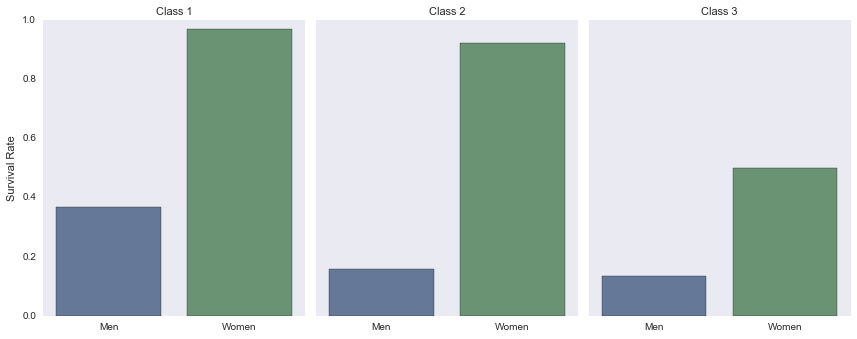

In [52]:
groupedby_class_survived_size = titanic_data_cleaned.groupby(['Pclass','Survived','Sex']).size()

# Print - Grouped by class, survival and sex
print groupedby_class_survived_size
print 'Class 1 - female survival rate: {}%'.format(survival_rate(1,'female'))
print 'Class 1 - male survival rate: {}%'.format(survival_rate(1,'male'))
print '-----'
print 'Class 2 - female survival rate: {}%'.format(survival_rate(2,'female'))
print 'Class 2 - male survival rate: {}%'.format(survival_rate(2,'male'))
print '-----'
print 'Class 3 - female survival rate: {}%'.format(survival_rate(3,'female'))
print 'Class 3 - male survival rate: {}%'.format(survival_rate(3,'male'))

# Graph - Grouped by class, survival and sex
g = sns.factorplot(x="Sex", y="Survived", col="Pclass", data=titanic_data_cleaned, 
                   saturation=.5, kind="bar", ci=None, size=5, aspect=.8)

(g.set_axis_labels("", "Survival Rate")
    .set_xticklabels(["Men", "Women"])
    .set_titles("Class {col_name}")
    .set(ylim=(0, 1))
    .despine(left=True, bottom=True))

Based on the raw numbers it would appear as though passengers in Class 3 had a similar survival rate as those from Class 1 with 119 and 136 passengers surviving respectively. However, looking at the percentages of the overall passengers per class, it can be assumed that a passenger from Class 1 is about 2.5x times more likely to survive than those in Class 3. 

Social-economic standing was a factor in survival rate of passengers.

- Class 1: **62.96%**
- Class 2: **47.28%**
- Class 3: **24.24%**

## Question 2
Did age, regardless of sex and class, determine your chances of survival?

Number for females and males with age missing are 53 and 124 respectively
177
288
424
28.1932986111
30.6261792453
80.0
74.0


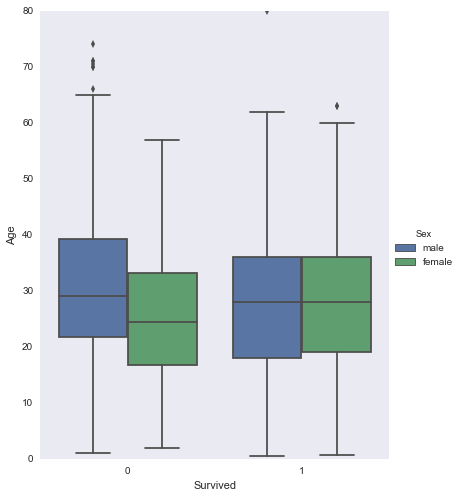

In [53]:
print 'Number for females and males with age missing are {} and {} respectively'.format(
missing_age_female.sum(),missing_age_male.sum())

# Missing Age records
print titanic_data_cleaned['Age'].isnull().sum()

# Drop the NaN values. Calculations will be okay but will through off averages and counts
titanic_data_age_cleaned = titanic_data_cleaned.dropna()

# Find count of survivors and those who didn't
number_survived = titanic_data_age_cleaned[titanic_data_age_cleaned['Survived'] == True]['Survived'].count()
number_died = titanic_data_age_cleaned[titanic_data_age_cleaned['Survived'] == False]['Survived'].count()

# Find average of survivors and those who didn't
mean_age_survived = titanic_data_age_cleaned[titanic_data_age_cleaned['Survived'] == True]['Age'].mean()
mean_age_died = titanic_data_age_cleaned[titanic_data_age_cleaned['Survived'] == False]['Age'].mean()


print number_survived
print number_died

print mean_age_survived
print mean_age_died

print oldest_to_survive
print oldest_to_die

sns.factorplot(x="Survived", y="Age", hue='Sex', data=titanic_data_age_cleaned, kind="box", size=7, aspect=.8)

Based on the above boxplot and calculated data, it would appear that:
- Regardless of sex and class, age was not a deciding factor in the passenger survival rate
- Average age for those who survived and even those you did not survive were inline with eachother

## Question 3
Did women and children have preference to lifeboats and therefore survival (assuming there was no shortage of lifeboats)?

- Men, women, children
- need to flag "children" (under 18) and separate male children from "men"
- Percentage of men survivors vs that or women and children

Category  Survived
Child     0            52
          1            61
Man       0           325
          1            70
Woman     0            47
          1           157
dtype: int64


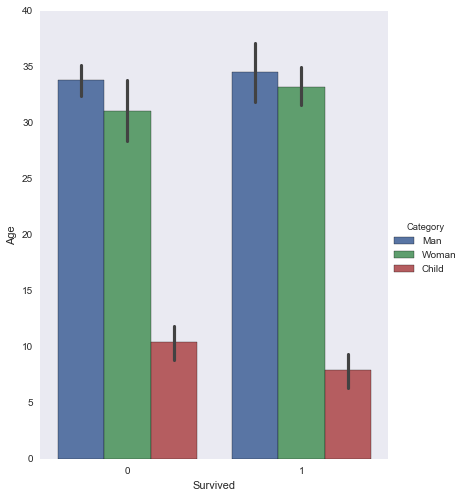

In [200]:
# Create Cateogry column, then categorize people
titanic_data_age_cleaned.loc[
    ( (titanic_data_age_cleaned['Sex'] == 'female') & 
    (titanic_data_age_cleaned['Age'] >= 18) ),
    'Category'] = 'Woman'

titanic_data_age_cleaned.loc[
    ( (titanic_data_age_cleaned['Sex'] == 'male') & 
    (titanic_data_age_cleaned['Age'] >= 18) ),
    'Category'] = 'Man'

titanic_data_age_cleaned.loc[
    (titanic_data_age_cleaned['Age'] < 18),
    'Category'] = 'Child'

titanic_data_age_cleaned.loc[:10]

c = titanic_data_age_cleaned.groupby(['Category','Survived'])
print c.size()

# TODO: fix up graph and labels (need totals not Age on y axis)
sns.factorplot(x="Survived", y="Age", hue='Category', data=titanic_data_age_cleaned, kind="bar", size=7, aspect=.8)

**TODO: add thoughts on question**

## Question 4
Did women with children have a better survival rate vs women without children (adults 18+)?
- women that are parents -> survival rate
- women that were not parents -> survial rate

In [58]:
# Determine number of woman that are not parents
titanic_data_woman_parents = titanic_data_age_cleaned.loc[
    (titanic_data_age_cleaned['Category'] == 'Woman') &
    (titanic_data_age_cleaned['Parch'] > 0)]

# Determine number of woman over 20 that are not parents
titanic_data_woman_parents_maybe = titanic_data_age_cleaned.loc[
    (titanic_data_age_cleaned['Category'] == 'Woman') &
    (titanic_data_age_cleaned['Parch'] > 0) & 
    (titanic_data_age_cleaned['Age'] > 20)]

In [59]:
titanic_data_woman_parents.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Category
8,1,3,female,27.0,0,2,11.1333,S,Woman
25,1,3,female,38.0,1,5,31.3875,S,Woman
88,1,1,female,23.0,3,2,263.0000,S,Woman
98,1,2,female,34.0,0,1,23.0000,S,Woman
136,1,1,female,19.0,0,2,26.2833,S,Woman


In [61]:
titanic_data_woman_parents_maybe.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Category
8,1,3,female,27.0,0,2,11.1333,S,Woman
25,1,3,female,38.0,1,5,31.3875,S,Woman
88,1,1,female,23.0,3,2,263.0000,S,Woman
98,1,2,female,34.0,0,1,23.0000,S,Woman
167,0,3,female,45.0,1,4,27.9000,S,Woman


Slight problem

Reviewing the data, I noticed a potential issue which I didn't think of before i.e **A woman with Age: 23 and Parch: 2 could be onboard with her children OR both parents.** Based on the 'Parch' definition (below) provided with the data, I don't believe it's possible to accurately determine women with children vs women with parents onboard  
 - Parch - number of parents or children on board

## Question 5
How did children with nanny's compare fare in compariso to children with parents. Did the nanny "abandon" the child to save his/her own life?
 - Need to review list for children with no parents. These will be children with nannies. Potential Q5
 - Compare above survival rate with children that had parents
 
Assumptions:
1. if you're classified as a 'Child' (under 18) and have Parch > 0, then the value is associated to your Parents. Eventhough it is possible to be under 18 and be a parent.
2. Classifying people as 'Child' represented by those under 18 years old is applying today's standards to the 1900 century

In [173]:
titanic_data_children_nannies = titanic_data_age_cleaned.loc[
    (titanic_data_age_cleaned['Category'] == 'Child') &
    (titanic_data_age_cleaned['Parch'] == 0)]

titanic_data_children_parents = titanic_data_age_cleaned.loc[
    (titanic_data_age_cleaned['Category'] == 'Child') &
    (titanic_data_age_cleaned['Parch'] > 0)]

In [176]:
# Determine children with nannies who survived and who did not
survived_children_nannies = titanic_data_children_nannies.Survived.sum()
total_children_nannies = titanic_data_children_nannies.Survived.count()
pct_survived_nannies = ((float(survived_children_nannies)/total_children_nannies)*100)
pct_survived_nannies = np.round(pct_survived_nannies,2)

# Display results
print 'Total number of children without nannies: {}\n\
Children without nannies who survived: {}\n\
Children without nannies who did not survive: {}\n\
Percentage of children who survived: {}%'\
.format(total_children_nannies, survived_children_nannies, 
        total_children_nannies-survived_children_nannies, pct_survived_nannies)

# Verify counts (looked a bit too evenly divided)
titanic_data_children_nannies.loc[titanic_data_children_nannies['Survived'] == 1]

Total number of children without nannies: 32
Children without nannies who survived: 16
Children without nannies who did not survive: 16
Percentage of children who survived: 50.0%


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Category
9,1,2,female,14.0,1,0,30.0708,C,Child
22,1,3,female,15.0,0,0,8.0292,Q,Child
39,1,3,female,14.0,1,0,11.2417,C,Child
84,1,2,female,17.0,0,0,10.5000,S,Child
125,1,3,male,12.0,1,0,11.2417,C,Child
156,1,3,female,16.0,0,0,7.7333,Q,Child
208,1,3,female,16.0,0,0,7.7500,Q,Child
220,1,3,male,16.0,0,0,8.0500,S,Child
307,1,1,female,17.0,1,0,108.9000,C,Child
389,1,2,female,17.0,0,0,12.0000,C,Child


In [177]:
# Determine children with parents who survived and who did not
survived_children = titanic_data_children_parents.Survived.sum()
total_children = titanic_data_children_parents.Survived.count()
pct_survived = ((float(survived_children)/total_children)*100)
pct_survived = np.round(pct_survived,2)

# Display results
print 'Total number of children with parents: {}\n\
Children with parents who survived: {}\n\
Children with parents who did not survive: {}\n\
Percentage of children who survived: {}%'\
.format(total_children, survived_children, total_children-survived_children, pct_survived)

Total number of children with parents: 81
Children with parents who survived: 45
Children with parents who did not survive: 36
Percentage of children who survived: 55.56%


In [199]:
# Graph things up to show a better comparison
#sns.factorplot(x="Survived", y="Age", hue='Category', data=titanic_data_age_cleaned, kind="bar", size=7, aspect=.8)

## Conclusion
- Communicated tentativeness of findings
- The results of the analysis are presented such that any limitations are clear. The analysis does not state or imply that one change causes another based solely on a correlation.

## References

- https://www.kaggle.com/c/titanic/data
- http://nbviewer.jupyter.org/github/jvns/pandas-cookbook/tree/master/cookbook/
- https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.factorplot.html#seaborn.factorplot
- http://www.ncbi.nlm.nih.gov/pmc/articles/PMC3865739/